In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/MLDataSets/crop_dataset.csv')

In [6]:
df.head()

,Crop,N (mg/kg),P (mg/kg),K (mg/kg),pH,EC(uS/cm),MOISTURE (%)
0,Cassava,150,50,100,5.5,1.5,60
1,Cassava,150,50,100,5.5,1.5,62
2,Cassava,150,50,100,5.5,1.5,64
3,Cassava,150,50,100,5.5,1.5,66
4,Cassava,150,50,100,5.5,1.5,68


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N (mg/kg),37581648.0,154.018754,23.457893,100.0,136.0,156.0,172.0,200.0
P (mg/kg),37581648.0,58.809504,14.384247,40.0,48.0,56.0,66.0,100.0
K (mg/kg),37581648.0,131.073688,19.053413,100.0,116.0,130.0,144.0,180.0
pH,37581648.0,6.055637,0.525872,4.8,5.7,6.1,6.4,7.5
EC(uS/cm),37581648.0,1.802771,0.447555,0.8,1.5,1.7,2.1,2.5
MOISTURE (%),37581648.0,66.279758,17.399702,18.0,62.0,70.0,78.0,90.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37581648 entries, 0 to 37581647
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Crop          object 
 1   N (mg/kg)     int64  
 2   P (mg/kg)     int64  
 3   K (mg/kg)     int64  
 4   pH            float64
 5   EC(uS/cm)     float64
 6   MOISTURE (%)  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.0+ GB


In [9]:
df.columns

Index(['Crop', 'N (mg/kg)', 'P (mg/kg)', 'K (mg/kg)', 'pH', 'EC(uS/cm)',
       'MOISTURE (%)'],
      dtype='object')

In [10]:
df.shape

(37581648, 7)

In [11]:
df['Crop'].nunique()

14

In [12]:
df['Crop'].unique()

array(['Cassava', 'Vanilla', 'Coffee', 'Cotton ', 'Tea', 'Tobacco',
       'Groundnuts', 'Yams', 'Maize (corn)', 'Beans', 'Irish Potato',
       'Matooke', 'Sweet Banana', 'Sugarcane'], dtype=object)

In [13]:
df['Crop'].value_counts()

Cassava         6960096
Maize (corn)    4333056
Cotton          3510936
Matooke         3510936
Sweet Banana    3510936
Sugarcane       2785536
Tobacco         2553408
Yams            2340624
Irish Potato    2011776
Vanilla         1702272
Beans           1702272
Groundnuts      1276704
Coffee           981552
Tea              401544
Name: Crop, dtype: int64

In [14]:
df.isnull()  # checking for the null values

,Crop,N (mg/kg),P (mg/kg),K (mg/kg),pH,EC(uS/cm),MOISTURE (%)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
37581643,False,False,False,False,False,False,False
37581644,False,False,False,False,False,False,False
37581645,False,False,False,False,False,False,False
37581646,False,False,False,False,False,False,False


In [15]:
#sns.heatmap(df.isnull()) # representing it on a heatmap so that it can be visble

In [16]:
#sns.heatmap(df.corr(),annot=True)

In [17]:
df.dtypes

Crop             object
N (mg/kg)         int64
P (mg/kg)         int64
K (mg/kg)         int64
pH              float64
EC(uS/cm)       float64
MOISTURE (%)      int64
dtype: object

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import LabelEncoder

encoded = LabelEncoder()
target_variable = encoded.fit_transform(df.iloc[:,:1])
target_variable

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, ..., 8, 8, 8])

In [20]:
X = df.drop('Crop',axis=1)

In [21]:
y = target_variable

In [22]:
X.shape

(37581648, 6)

In [23]:
y.shape

(37581648,)

In [24]:
y


array([1, 1, 1, ..., 8, 8, 8])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
X_train.shape

(26307153, 6)

In [31]:
y_train.shape

(26307153,)

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
from tensorflow.keras.layers import Dense

In [36]:
early_stop = EarlyStopping(monitor='accuracy',mode='max',verbose=1,patience=1)

In [37]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(14,activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy')

In [38]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=128,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
205523/205525 [============================>.] - ETA: 0s - loss: 2.1038

205525/205525 [==============================] - 588s 3ms/step - loss: 2.1038 - val_loss: 1.7631
Epoch 2/25
205515/205525 [============================>.] - ETA: 0s - loss: 2.0776

205525/205525 [==============================] - 649s 3ms/step - loss: 2.0776 - val_loss: 1.6214
Epoch 3/25
205518/205525 [============================>.] - ETA: 0s - loss: 2.0625

205525/205525 [==============================] - 659s 3ms/step - loss: 2.0625 - val_loss: 1.6456
Epoch 4/25
205523/205525 [============================>.] - ETA: 0s - loss: 2.0619

205525/205525 [==============================] - 671s 3ms/step - loss: 2.0619 - val_loss: 1.6534
Epoch 5/25
205503/205525 [============================>.] - ETA: 0s - loss: 2.0619

205525/205525 [==============================] - 634s 3ms/step - loss: 2.0619 - val_loss: 1.6612
Epoch 6/25
205513/205525 [============================>.] - ETA: 0s - loss: 2.0616

205525/205525 [==============================] - 592s 3ms/step - loss: 2.0616 - val_loss: 1.6597
Epoch 7/25
205510/205525 [============================>.] - ETA: 0s - loss: 2.0618

205525/205525 [==============================] - 557s 3ms/step - loss: 2.0618 - val_loss: 1.6520
Epoch 8/25
205512/205525 [============================>.] - ETA: 0s - loss: 2.0616

205525/205525 [==============================] - 522s 3ms/step - loss: 2.0616 - val_loss: 1.6550
Epoch 9/25
205510/205525 [============================>.] - ETA: 0s - loss: 2.0621

205525/205525 [==============================] - 563s 3ms/step - loss: 2.0621 - val_loss: 1.6599
Epoch 10/25
205507/205525 [============================>.] - ETA: 0s - loss: 2.0618

205525/205525 [==============================] - 548s 3ms/step - loss: 2.0618 - val_loss: 1.6507
Epoch 11/25
205515/205525 [============================>.] - ETA: 0s - loss: 2.0615

205525/205525 [==============================] - 535s 3ms/step - loss: 2.0615 - val_loss: 1.6765
Epoch 12/25
205512/205525 [============================>.] - ETA: 0s - loss: 2.0619

205525/205525 [==============================] - 574s 3ms/step - loss: 2.0619 - val_loss: 1.6606
Epoch 13/25
205525/205525 [==============================] - ETA: 0s - loss: 2.0618

205525/205525 [==============================] - 516s 3ms/step - loss: 2.0618 - val_loss: 1.6585
Epoch 14/25
205505/205525 [============================>.] - ETA: 0s - loss: 2.0619

205525/205525 [==============================] - 515s 3ms/step - loss: 2.0619 - val_loss: 1.6495
Epoch 15/25
205514/205525 [============================>.] - ETA: 0s - loss: 2.0618

205525/205525 [==============================] - 523s 3ms/step - loss: 2.0618 - val_loss: 1.6664
Epoch 16/25
205517/205525 [============================>.] - ETA: 0s - loss: 2.0618

205525/205525 [==============================] - 538s 3ms/step - loss: 2.0618 - val_loss: 1.6607
Epoch 17/25
205524/205525 [============================>.] - ETA: 0s - loss: 2.0616

205525/205525 [==============================] - 539s 3ms/step - loss: 2.0616 - val_loss: 1.6703
Epoch 18/25
205516/205525 [============================>.] - ETA: 0s - loss: 2.0617

205525/205525 [==============================] - 505s 2ms/step - loss: 2.0617 - val_loss: 1.6860
Epoch 19/25
205505/205525 [============================>.] - ETA: 0s - loss: 2.0621

205525/205525 [==============================] - 506s 2ms/step - loss: 2.0621 - val_loss: 1.6688
Epoch 20/25
205515/205525 [============================>.] - ETA: 0s - loss: 2.0621

205525/205525 [==============================] - 498s 2ms/step - loss: 2.0621 - val_loss: 1.6540
Epoch 21/25
205501/205525 [============================>.] - ETA: 0s - loss: 2.0623

205525/205525 [==============================] - 538s 3ms/step - loss: 2.0623 - val_loss: 1.6648
Epoch 22/25
205504/205525 [============================>.] - ETA: 0s - loss: 2.0623

205525/205525 [==============================] - 518s 3ms/step - loss: 2.0623 - val_loss: 1.6492
Epoch 23/25
205514/205525 [============================>.] - ETA: 0s - loss: 2.0623

205525/205525 [==============================] - 575s 3ms/step - loss: 2.0623 - val_loss: 1.6560
Epoch 24/25
205513/205525 [============================>.] - ETA: 0s - loss: 2.0622

205525/205525 [==============================] - 540s 3ms/step - loss: 2.0622 - val_loss: 1.6514
Epoch 25/25
205497/205525 [============================>.] - ETA: 0s - loss: 2.0624

205525/205525 [==============================] - 537s 3ms/step - loss: 2.0624 - val_loss: 1.6685


In [40]:
losses=pd.DataFrame(model.history.history)

<Axes: >

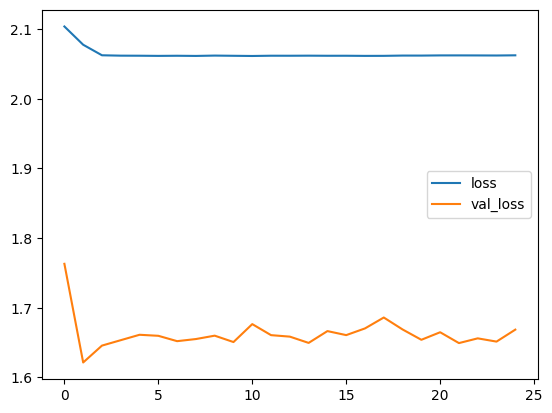

In [42]:
losses.plot()

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
predictions = model.predict(X_test)

NameError: ignored